In [43]:
from HMM import unsupervised_HMM
from Utility import Utility
import numpy as np
import re
shakespeare = open('data/shakespeare.txt').readlines()

In [44]:
def get_sonnets(txt):
    sonnets = []
    j = 1
    song = []
    for i in range(len(txt)):
        line = txt[i]
        arr = [str(j)]
        empt = []
        if line.split() == arr:
            if song != []:
                sonnets.append(song)
            song = []
            j += 1
        else:
            if line != '\n':
                if line[0] == line[1] and line[0] == ' ':
                    song.append(line[2:len(line)])
                else:
                    song.append(line)

    rawtxt = ''
    for sonnet in sonnets:
        for line in sonnet:
            rawtxt = rawtxt + line
    i = 0
    words = {}
    for sonnet in sonnets:
        for line in sonnet:
            line = re.sub('[;,:?!.\(\)]', '', line).lower()
            for word in line.split():
                if (word not in words.keys()):
                    words[word] = i
                    i += 1
    nums = []
    for sonnet in sonnets:
        tmp = []
        for line in sonnet:
            line = re.sub('[;,:?!.\(\)]', '', line).lower()
            for word in line.split():
                tmp.append(words[word])
        nums.append(tmp)

    return nums, words

In [45]:
def unsupervised_learning1(n_states, iters, g, gmap):
    '''
    Trains an HMM using supervised learning on the file 'ron.txt' and
    prints the results.

    Arguments:
        n_states:   Number of hidden states that the HMM should have.
    '''
    genres, genre_map = g, gmap
    # Train the HMM.        
    HMM = unsupervised_HMM(genres, n_states, iters)

    # Print the transition matrix.
    print("Transition Matrix:")
    print('#' * 70)
    for i in range(len(HMM.A)):
        print(''.join("{:<12.3e}".format(HMM.A[i][j]) for j in range(len(HMM.A[i]))))
    print('')
    print('')

    # Print the observation matrix. 
    print("Observation Matrix:  ")
    print('#' * 70)
    for i in range(len(HMM.O)):
        print(''.join("{:<12.3e}".format(HMM.O[i][j]) for j in range(len(HMM.O[i]))))
    print('')
    print('')
    return HMM.A, HMM.O, HMM

In [46]:
print('')
print('')
print('#' * 70)
print("{:^70}".format("Running Code For Question 2D"))
print('#' * 70)
print('')
print('')
g, gmap = get_sonnets(shakespeare)
A1, O1, HMM = unsupervised_learning1(8, 100, g, gmap)



######################################################################
                     Running Code For Question 2D                     
######################################################################


Iteration: 10
Iteration: 20
Iteration: 30
Iteration: 40
Iteration: 50
Iteration: 60
Iteration: 70
Iteration: 80
Iteration: 90
Iteration: 100
Transition Matrix:
######################################################################
1.894e-17   5.363e-28   1.899e-01   1.781e-22   1.965e-04   2.484e-26   8.774e-26   8.099e-01   
2.947e-01   1.005e-01   1.963e-01   6.143e-02   4.375e-02   1.453e-01   5.832e-02   9.968e-02   
3.138e-17   2.237e-21   7.012e-01   2.822e-09   9.122e-11   2.553e-01   2.170e-21   4.354e-02   
3.601e-01   1.615e-31   8.676e-19   8.429e-15   1.469e-01   4.128e-16   1.238e-28   4.929e-01   
2.022e-24   3.180e-32   1.293e-02   5.705e-03   2.544e-12   6.448e-01   3.366e-01   2.969e-15   
2.790e-12   9.755e-01   1.152e-30   1.497e-31   2.433e-02   3.509e-

In [47]:
from HMM import HiddenMarkovModel
from Utility import Utility
import random
import nltk
nltk.download('cmudict')
from nltk.corpus import cmudict 
d = cmudict.dict()
inv_map = {v: k for k, v in gmap.items()}
    
def rhyme(inp, level):
    entries = nltk.corpus.cmudict.entries()
    syllables = [(word, syl) for word, syl in entries if word == inp]
    rhymes = []
    for (word, syllable) in syllables:
         rhymes += [word for word, pron in entries if pron[-level:] == syllable[-level:]]
    return set(rhymes)


def generate_emission1(self, M, rhymer):
        '''
        Generates an emission of length M, assuming that the starting state
        is chosen uniformly at random. 

        Arguments:
            M:          Length of the emission to generate.

        Returns:
            emission:   The randomly generated emission as a list.

            states:     The randomly generated states as a list.
        '''

        emission = []
        states = []

        state_idx = random.choice(list(range(self.L)))
        emission.append(np.random.choice(list(range(self.D)), p = self.O[state_idx]))
        states.append(state_idx)
        
        syls = []
        
        for i in range(M):
            tmp = np.random.choice(range(self.D), p = self.O[state_idx])
            tmpl = list(range(self.L))
            if(i == M - 1 and rhymer == ''):
                while True:
                    tmp = np.random.choice(range(self.D), p = self.O[state_idx])
                    if(len(rhyme(inv_map[tmp], 1)) > 10):
                        break
            elif(i == M - 1 and rhymer != ''):
                while True:
                    tmp = np.random.choice(range(self.D), p = self.O[state_idx])
                    if(inv_map[tmp] in rhyme(rhymer, 1) and inv_map[tmp] != rhymer):
                        break
            emission.append(tmp)
            state_idx = np.random.choice(tmpl, p = self.A[state_idx])
            states.append(state_idx)

        return emission, states
    

def sequence_generator(A, O, k, M):
    '''
    Generates k emissions of length M using the HMM stored in the file
    'sequence_data<n>.txt' for a given n and prints the results.

    Arguments:
        N:          File index.
        K:          Number of sequences to generate.
        M:          Length of emission to generate.
    '''
    # Generate k input sequences.
    rhymer1 = ''
    rhymer2 = ''
    rhymer3 = ''
    
    for i in range(k):
        # Initialize an HMM.
        HMM = HiddenMarkovModel(A, O)
        count1 = 0
        count2 = 0
        if(i % 2 == 1 and i < k - 2):
            # Generate a single input sequence of length m.
            emission, states = generate_emission1(HMM, M, rhymer1)
            x = ' '.join([inv_map[i] for i in emission])
            rhymer1 = inv_map[emission[-1]]
            count1 += 1
            if(count1 == 2):
                rhymer1 = ''
        elif(i % 2 == 0 and i < k -2):
            # Generate a single input sequence of length m.
            emission, states = generate_emission1(HMM, M, rhymer2)
            x = ' '.join([inv_map[i] for i in emission])
            rhymer2 = inv_map[emission[-1]]
            count2 += 1
            if(count2 == 2):
                rhymer2 = ''
        elif(i >= k - 2):
            # Generate a single input sequence of length m.
            emission, states = generate_emission1(HMM, M, rhymer3)
            x = ' '.join([inv_map[i] for i in emission])
            rhymer3 = inv_map[emission[-1]]
        
        # Print the results.
        print("{:30}".format(x))

    print('')
    print('')


sequence_generator(A1, O1, 14, 10)

[nltk_data] Downloading package cmudict to C:\Users\Jen
[nltk_data]     Yu\AppData\Roaming\nltk_data...
[nltk_data]   Package cmudict is already up-to-date!


as be are when can times sorrow part sickness the being
my to our o height is feast my canopy is more
thine i root and proceed your time who to-day thing nothing
still all their of fair for his present'st set my fair
over-goes in nature sympathized ignorance the distraction wink than those being
beauty treasure rage it proud my of own not and or
no and outlive stores to thee both and every world controlling
those cannot but for might and suspect me your worst dear
love world's to such admired that argument one in thou seeming
of dear am fist self that as eyes' treasure so prepare
none prisoner let offend words where it and much deep belong
but new find measured tied in worth might both hold for
foison to my false by rite yet and to quick care
all other soundless than woo for like souls defence knows more




In [48]:
import pyphen
dic = pyphen.Pyphen(lang='en')

def count_syllables(word):
    return dic.inserted(word).count('-')+1

def generate_emission2(self, M):
        '''
        Generates an emission of length M, assuming that the starting state
        is chosen uniformly at random. 

        Arguments:
            M:          Length of the emission to generate.

        Returns:
            emission:   The randomly generated emission as a list.

            states:     The randomly generated states as a list.
        '''

        emission = []
        states = []

        state_idx = random.choice(list(range(self.L)))
        emission.append(np.random.choice(list(range(self.D)), p = self.O[state_idx]))
        states.append(state_idx)
        syllables = 0
        
        while True:
            tmp = np.random.choice(range(self.D), p = self.O[state_idx])
            while(syllables + count_syllables(inv_map[tmp]) > M):
                tmp = np.random.choice(range(self.D), p = self.O[state_idx])
            emission.append(tmp)
            state_idx = np.random.choice(list(range(self.L)), p = self.A[state_idx])
            states.append(state_idx)
            syllables += count_syllables(inv_map[tmp])
            if(syllables == M):
                break
        return emission, states
    
def sequence_generator2(A, O, k, M):
    '''
    Generates k emissions of length M using the HMM stored in the file
    'sequence_data<n>.txt' for a given n and prints the results.

    Arguments:
        N:          File index.
        K:          Number of sequences to generate.
        M:          Length of emission to generate.
    '''


    # Generate k input sequences.
    for i in range(k):
        # Initialize an HMM.
        HMM = HiddenMarkovModel(A, O)

        # Generate a single input sequence of length m.
        emission, states = generate_emission2(HMM, M)
        x = ' '.join([inv_map[i] for i in emission])
        
        # Print the results.
        print("{:30}".format(x))

    print('')
    print('')



sequence_generator2(A1, O1, 14, 10)

do me on true marvel as bright long for palate
fearing o merit and his the by i far in
i habit wood like for 'tis swear some rent that this
nor it extreme quick a of one thou my love
complexion deeds rich loves i art doth who for the time
no your not and balmy of overturn and is with
my the of never dead up you thou gulls heart
thou committed hath to to the thou my a
profaned intelligence account gentle so whence
in into first-born but watching praise well in
affairs book jollity words knife and to and front
i him yet wherefore bounty fire three pluck thee
reason world show no so thee to beauty so what
to make thy have from some have your see believe




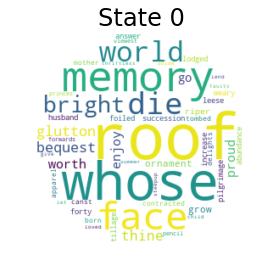

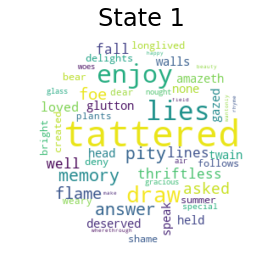

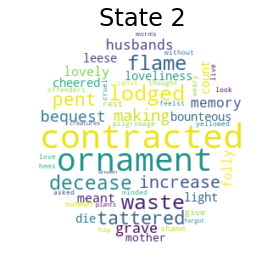

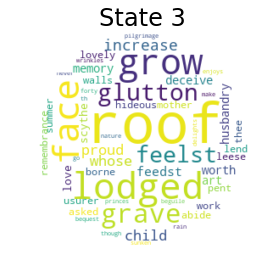

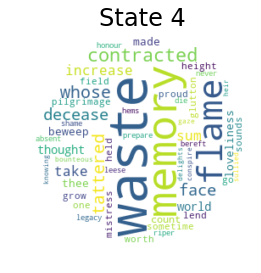

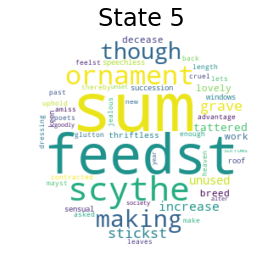

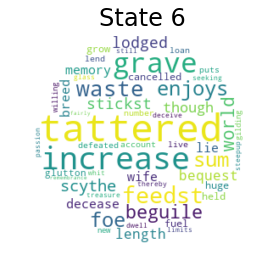

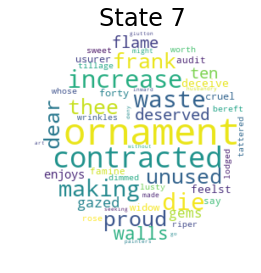

In [49]:
import os
import numpy as np
from IPython.display import HTML

from HMM import unsupervised_HMM
from HMM_helper import (
    text_to_wordcloud,
    states_to_wordclouds,
    parse_observations,
    sample_sentence,
    visualize_sparsities,
    animate_emission
)

txt = ''
for s in shakespeare:
    txt += s
    
o, omap = parse_observations(txt)
wordclouds = states_to_wordclouds(HMM, omap)

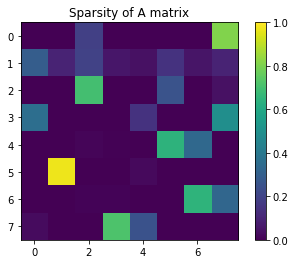

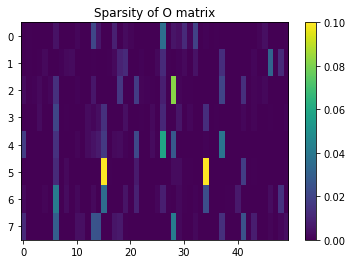

In [50]:
visualize_sparsities(HMM, O_max_cols=50)

In [77]:
spenser = open('data/spenser.txt').readlines()
print('')
print('')
print('#' * 70)
print("{:^70}".format("Running Code For Question 2D"))
print('#' * 70)
print('')
print('')
g2, gmap2 = get_sonnets(spenser)
A2, O2, HMM2 = unsupervised_learning1(8, 100, g2, gmap2)



######################################################################
                     Running Code For Question 2D                     
######################################################################


Iteration: 10
Iteration: 20
Iteration: 30
Iteration: 40
Iteration: 50
Iteration: 60
Iteration: 70
Iteration: 80
Iteration: 90
Iteration: 100
Transition Matrix:
######################################################################
1.613e-19   2.808e-25   2.606e-01   2.669e-01   4.462e-29   1.843e-26   9.277e-02   3.797e-01   
2.317e-38   7.369e-01   7.390e-15   2.039e-01   2.519e-28   3.563e-28   5.922e-02   3.320e-32   
8.023e-37   1.357e-01   2.448e-17   1.120e-01   5.193e-01   6.379e-02   1.692e-01   3.180e-25   
6.503e-01   5.203e-39   4.091e-33   1.917e-19   2.186e-36   2.031e-01   3.253e-25   1.466e-01   
6.558e-21   1.393e-25   3.131e-24   6.550e-01   8.604e-09   3.183e-01   2.662e-02   2.675e-25   
1.069e-36   2.816e-35   6.620e-36   4.496e-30   5.898e-01   7.510e-

In [ ]:
sequence_generator(A2, O2, 14, 10)

weary ere assured numbers desire doth spring herald with eyes death
bud gav'st decease majesty windows be conquest silvered be unthrifts thou
course glutton eloquence neither pay alchemy delight time grow'st though with


In [ ]:
sequence_generator2(A2, O2, 14, 10)